<a href="https://colab.research.google.com/github/dawood5253/DataScience_Codes/blob/main/EDA_TASK_Compwallah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing of data set and libraries required
netf=pd.read_csv('netflix_titles.csv')

In [5]:
netf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
keys=list(set(netf.type))
explode=[0,0.1]

1-What percentage of Netflix contents are Movies? TV Shows?

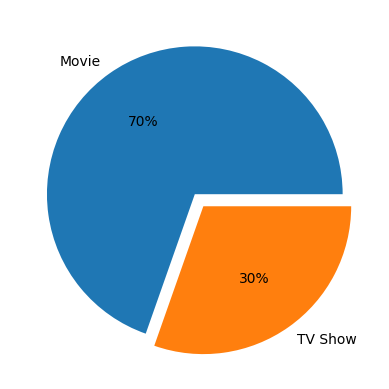

In [7]:
plt.pie(netf.type.value_counts(), labels=keys, autopct='%.0f%%',explode=explode)
plt.show()


2-The amount of Netflix content by country?

In [8]:
netf.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

3-Who are the most popular actors and directors on Netflix?

In [9]:
#5 Most popular Directors

In [10]:
director_counts = netf['director'].value_counts().reset_index()

In [11]:
director_counts

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
...,...,...
4523,"Raymie Muzquiz, Stu Livingston",1
4524,Joe Menendez,1
4525,Eric Bross,1
4526,Will Eisenberg,1


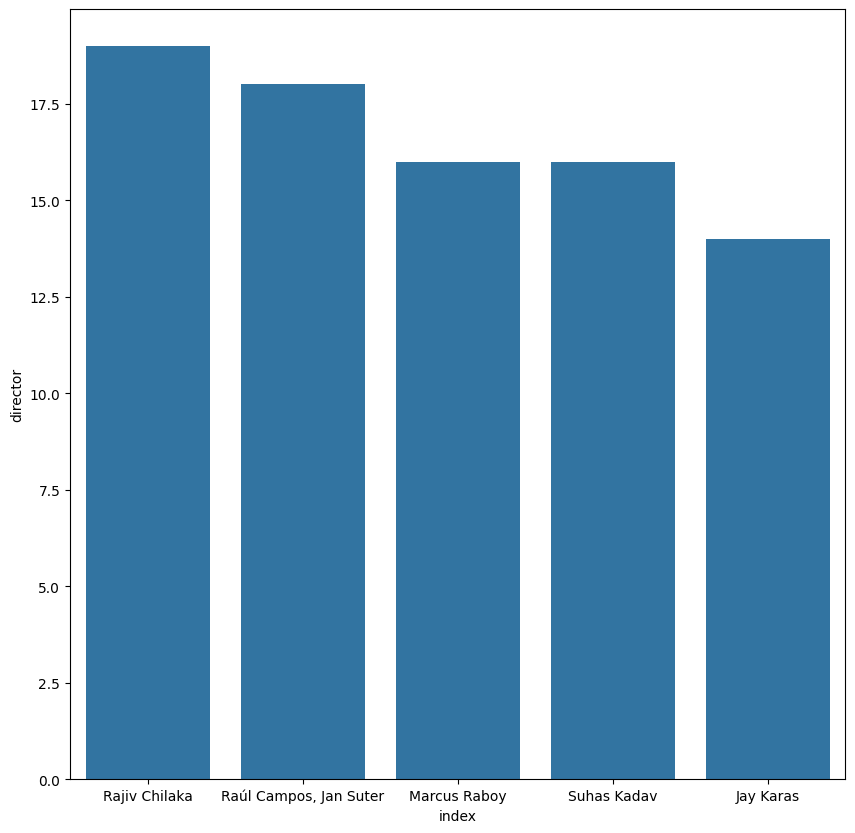

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(director_counts.head(),x='index',y='director')
plt.show()

In [13]:
actor_counts = netf['cast'].value_counts().reset_index()

In [14]:
actor_counts.head()

,index,cast
0,David Attenborough,19
1,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",14
2,Samuel West,10
3,Jeff Dunham,7
4,"David Spade, London Hughes, Fortune Feimster",6


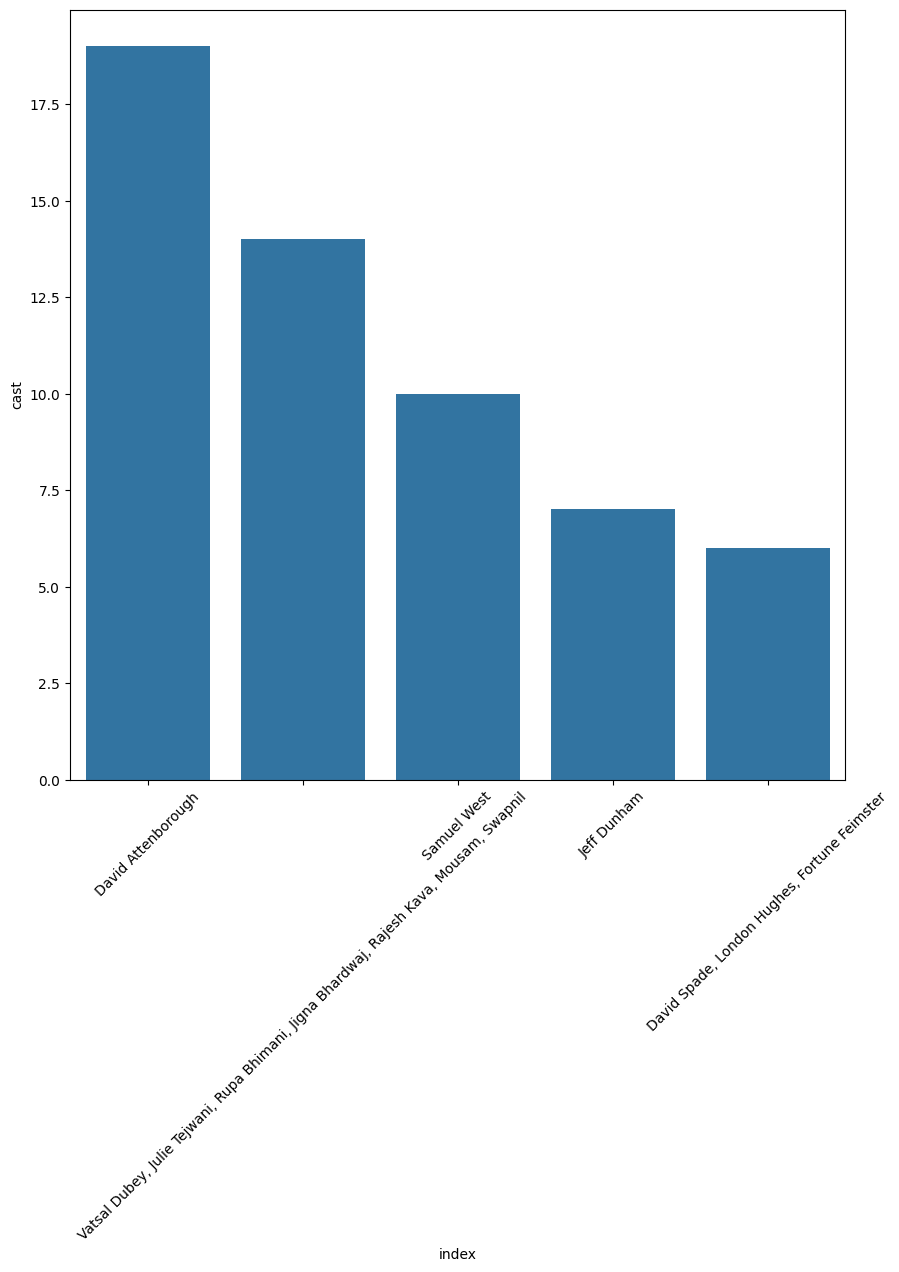

In [27]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(actor_counts.head(),x='index',y='cast')
plt.show()

4-What kind of content is Netflix focusing on?


In [21]:
cont=netf['listed_in'].value_counts().reset_index()

In [23]:
cont.head()

,index,listed_in
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252


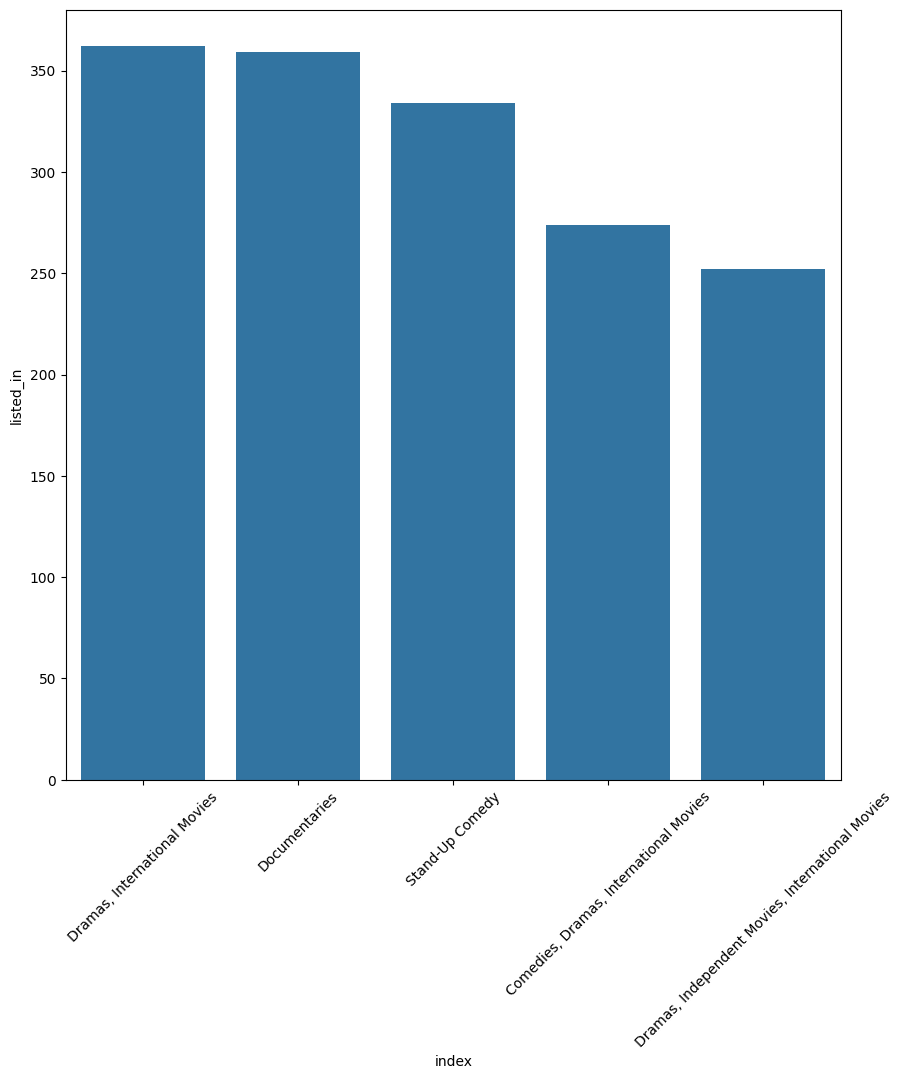

In [29]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.barplot(cont.head(),x='index',y='listed_in')
plt.show()

5-What are the top genres per country?


In [40]:
genre_counts = netf.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Find the index of the maximum count for each country
top_genre_index = genre_counts.groupby('country')['count'].idxmax()
top_genres_per_country = genre_counts.loc[top_genre_index]
filt=top_genres_per_country.sort_values(by='count',ascending=False).head()


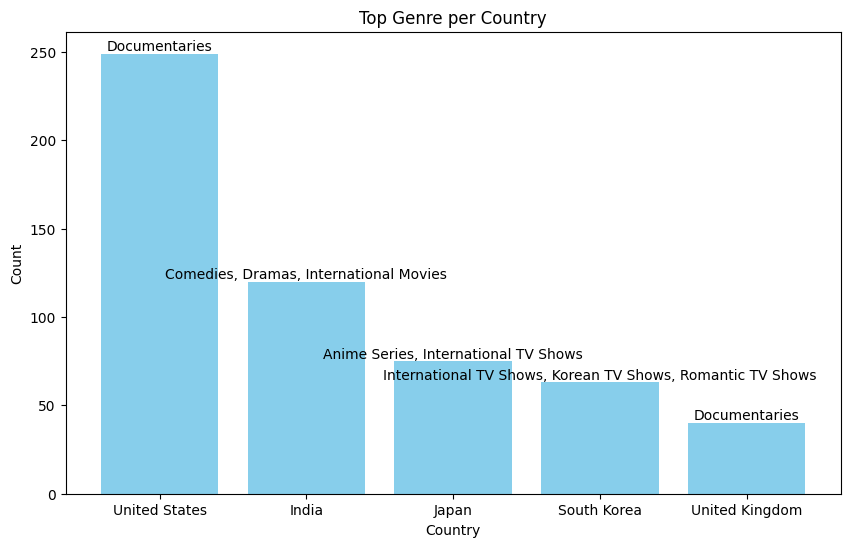

In [43]:
plt.figure(figsize=(10, 6))
bars = plt.bar(filt['country'], filt['count'], color='skyblue')

# Adding genre labels to the bars
for bar, genre in zip(bars, filt['listed_in']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, genre, ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top Genre per Country')
plt.show()

Q-The most-used words in the descriptions and titles of contents on Netflix

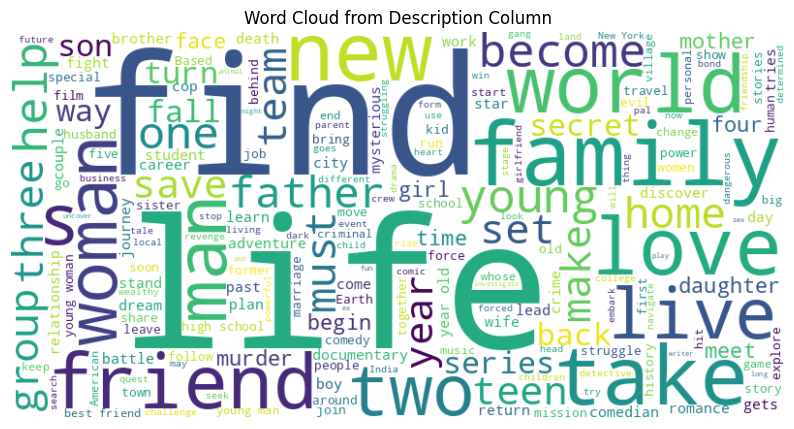

In [44]:
from wordcloud import WordCloud
text = ' '.join(netf['description'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud from Description Column')
plt.axis('off')
plt.show()
